In [140]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mplsoccer import PyPizza

In [9]:
# Import data
data = pd.read_csv("./Data/Wingers profile.csv", sep=",", encoding="utf-8")
data.head()

,Player,Pos,Squad,90s,Assists,Expected Goals Assists,Expected Assists,Assists Overperformance,Key Passes,Passes into final third,...,Goal-created Actions,Touches in Mid 3rd,Touches in Attacking 3rd,Touches in penalty box,Attempted Take-ons,Take-ons Success %,Carries,Progressive Distance,Progressive Carries,Progressive Passes Received
0,Ella Abdul Massih,"FW,MF",W Sydney,1.2,0.00,0.33,0.25,-0.33,2.50,6.67,...,0.00,40.0,28.30,5.00,1.67,0.0,32.5,51.7,0.83,2.50
1,Isabella Accardo,"DF,FW",Melb City,0.1,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,20.0,10.00,0.00,10.00,0.0,10.0,0.0,0.00,0.00
2,Josie Allan,"DF,FW",Newcastle,0.1,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,10.0,80.00,30.00,0.00,NaN,60.0,160.0,10.00,30.00
3,Lauren Allan,"FW,DF",Newcastle,19.1,0.26,0.23,0.16,0.04,1.83,1.57,...,0.42,13.4,22.90,3.40,2.41,45.7,21.3,72.0,2.77,9.11
4,Liz Anton,DF,Perth,18.9,0.16,0.11,0.03,0.05,0.58,2.33,...,0.16,21.2,5.56,0.48,1.11,52.4,32.8,90.1,1.43,1.48


In [33]:
# Filter data to contain wingers with 10 or more 90s
filteredData = data[
    (data["90s"] >= 10) & (data["Pos"].isin(["FW,MF", "MF,FW", "MF,DF"]))
].reset_index(drop=True)

# Drop columns that are not needed
filteredData = filteredData.drop(
    columns=[
        "Pos",
        "Squad",
        "90s",
    ]
)

filteredData.head()

,Player,Assists,Expected Goals Assists,Expected Assists,Assists Overperformance,Key Passes,Passes into final third,Passes into penalty box,Crosses into penalty box,Progressive passes,...,Goal-created Actions,Touches in Mid 3rd,Touches in Attacking 3rd,Touches in penalty box,Attempted Take-ons,Take-ons Success %,Carries,Progressive Distance,Progressive Carries,Progressive Passes Received
0,Alexia Apostolakis,0.06,0.18,0.14,-0.11,2.15,3.42,0.44,0.13,3.61,...,0.13,24.1,17.7,0.63,2.15,41.2,22.8,52.6,1.08,2.66
1,Rola Badawiya,0.11,0.09,0.12,0.02,1.05,1.05,0.39,0.11,2.15,...,0.28,17.1,22.8,5.25,3.59,43.1,27.3,65.5,2.76,8.51
2,MelindaJ Barbieri,0.06,0.20,0.22,-0.14,2.06,2.32,0.77,0.39,2.84,...,0.19,18.3,22.8,1.74,1.94,40.0,20.3,36.0,0.90,5.42
3,Hannah Blake,0.06,0.07,0.14,-0.02,1.14,2.05,0.91,0.23,3.69,...,0.28,21.6,17.7,1.93,2.39,50.0,28.3,70.1,2.33,5.97
4,Hope Breslin,0.18,0.12,0.08,0.07,1.33,2.91,0.48,0.18,3.88,...,0.30,28.6,11.6,1.52,2.00,33.3,24.2,47.3,0.97,4.12


In [34]:
# Get all numeric columns
numericColumns = filteredData.columns[1:]

# Create a dataframe to store the z-scores
zScores = pd.DataFrame(columns=numericColumns)

# Calculate the z-scores of the numeric columns
zScores[numericColumns] = (
    filteredData[numericColumns] - filteredData[numericColumns].mean()
) / filteredData[numericColumns].std()

# Standardise the data to produce ratings on 1-100 scale
zScores[numericColumns] = (zScores[numericColumns] * 10) + 50

# Add the player names to the standardised data
zScores["Player"] = filteredData["Player"]

zScores.head()

,Assists,Expected Goals Assists,Expected Assists,Assists Overperformance,Key Passes,Passes into final third,Passes into penalty box,Crosses into penalty box,Progressive passes,Shot-created Actions,...,Touches in Mid 3rd,Touches in Attacking 3rd,Touches in penalty box,Attempted Take-ons,Take-ons Success %,Carries,Progressive Distance,Progressive Carries,Progressive Passes Received,Player
0,44.226085,53.658698,51.129701,37.807678,69.714653,65.734685,35.644417,43.505932,50.640223,58.750900,...,60.050840,49.353284,33.482827,48.144255,46.701787,45.872973,44.930760,39.609674,37.757476,Alexia Apostolakis
1,48.556521,42.783303,48.324926,55.979674,45.393773,33.786010,34.260375,42.294603,35.550474,52.068763,...,43.365651,59.022421,62.704572,62.676254,48.834091,57.128501,51.329659,57.241742,63.000040,Rola Badawiya
2,44.226085,56.075452,62.348802,33.614140,67.724763,50.906186,44.779089,59.253205,42.681931,64.339597,...,46.225969,59.022421,40.503636,46.025005,45.355068,39.619901,36.696517,37.720524,49.666789,MelindaJ Barbieri
3,44.226085,40.366548,51.129701,50.388291,47.383663,47.266464,48.654404,49.562576,51.467059,57.171486,...,54.091844,49.353284,41.705396,50.566255,56.577722,59.629730,53.611437,52.728772,52.040021,Hannah Blake
4,54.619132,46.408434,42.715375,62.968903,51.584542,58.859654,36.751650,46.534254,53.430794,45.872599,...,70.777033,37.788239,39.112124,46.630505,37.835890,49.374693,42.301755,38.455193,44.057330,Hope Breslin


In [35]:
zScores.columns

Index(['Assists', 'Expected Goals Assists', 'Expected Assists',
       'Assists Overperformance', 'Key Passes', 'Passes into final third',
       'Passes into penalty box', 'Crosses into penalty box',
       'Progressive passes', 'Shot-created Actions', 'Goal-created Actions',
       'Touches in Mid 3rd', 'Touches in Attacking 3rd',
       'Touches in penalty box', 'Attempted Take-ons', 'Take-ons Success %',
       'Carries', 'Progressive Distance', 'Progressive Carries',
       'Progressive Passes Received', 'Player'],
      dtype='object')

In [36]:
# Add weighting to the standardised data
zScores_Weighting = zScores.copy()

## Chance creation (35%)
### Assists (20%), Expected Goals Assists (15%), Expected Assists (15%), Assists Overperformance (10%),
### Shot Creating Actions (20%), Goal Creating Actions (20%)
zScores_Weighting["Assists"] = zScores_Weighting["Assists"] * 0.2
zScores_Weighting["Expected Goals Assists"] = (
    zScores_Weighting["Expected Goals Assists"] * 0.15
)
zScores_Weighting["Expected Assists"] = zScores_Weighting["Expected Assists"] * 0.15
zScores_Weighting["Assists Overperformance"] = (
    zScores_Weighting["Assists Overperformance"] * 0.1
)
zScores_Weighting["Shot-created Actions"] = (
    zScores_Weighting["Shot-created Actions"] * 0.2
)
zScores_Weighting["Goal-created Actions"] = (
    zScores_Weighting["Goal-created Actions"] * 0.2
)

# Calculate the total score for chance creation
zScores_Weighting["Chance creation (35%)"] = (
    zScores_Weighting["Assists"]
    + zScores_Weighting["Expected Goals Assists"]
    + zScores_Weighting["Expected Assists"]
    + zScores_Weighting["Assists Overperformance"]
    + zScores_Weighting["Shot-created Actions"]
    + zScores_Weighting["Goal-created Actions"]
)

## Passing (30%)
### Passes into final third (20%), Passes into penalty box (20%), Crosses into penalty box (20%),
### Progressive passes (20%), Key passes (20%)
zScores_Weighting["Passes into final third"] = (
    zScores_Weighting["Passes into final third"] * 0.2
)
zScores_Weighting["Passes into penalty box"] = (
    zScores_Weighting["Passes into penalty box"] * 0.2
)
zScores_Weighting["Crosses into penalty box"] = (
    zScores_Weighting["Crosses into penalty box"] * 0.2
)
zScores_Weighting["Progressive passes"] = zScores_Weighting["Progressive passes"] * 0.2
zScores_Weighting["Key Passes"] = zScores_Weighting["Key Passes"] * 0.2

# Calculate the total score for passing
zScores_Weighting["Passing (30%)"] = (
    zScores_Weighting["Passes into final third"]
    + zScores_Weighting["Passes into penalty box"]
    + zScores_Weighting["Crosses into penalty box"]
    + zScores_Weighting["Progressive passes"]
    + zScores_Weighting["Key Passes"]
)

## Possession (35%)
### Touches in Mid 3rd (10%), Touches in Attacking 3rd (10%), Touches in penalty box (10%),
### Attempted Take-ons (20%), Take-ons Success % (20%),
### Carries (10%), Progressive Carries (10%), Progressive Distance (10%)
zScores_Weighting["Touches in Mid 3rd"] = zScores_Weighting["Touches in Mid 3rd"] * 0.1
zScores_Weighting["Touches in Attacking 3rd"] = (
    zScores_Weighting["Touches in Attacking 3rd"] * 0.1
)
zScores_Weighting["Touches in penalty box"] = (
    zScores_Weighting["Touches in penalty box"] * 0.1
)
zScores_Weighting["Attempted Take-ons"] = zScores_Weighting["Attempted Take-ons"] * 0.2
zScores_Weighting["Take-ons Success %"] = zScores_Weighting["Take-ons Success %"] * 0.2
zScores_Weighting["Carries"] = zScores_Weighting["Carries"] * 0.1
zScores_Weighting["Progressive Carries"] = (
    zScores_Weighting["Progressive Carries"] * 0.1
)
zScores_Weighting["Progressive Distance"] = (
    zScores_Weighting["Progressive Distance"] * 0.1
)

# Calculate the total score for possession
zScores_Weighting["Possession (35%)"] = (
    zScores_Weighting["Touches in Mid 3rd"]
    + zScores_Weighting["Touches in Attacking 3rd"]
    + zScores_Weighting["Touches in penalty box"]
    + zScores_Weighting["Attempted Take-ons"]
    + zScores_Weighting["Take-ons Success %"]
    + zScores_Weighting["Carries"]
    + zScores_Weighting["Progressive Carries"]
    + zScores_Weighting["Progressive Distance"]
)

In [50]:
# Extract the total scores
totalScores = zScores_Weighting[
    ["Player", "Chance creation (35%)", "Passing (30%)", "Possession (35%)"]
]

# Calculate the overall rating
totalScores["Overall Rating"] = (
    totalScores["Chance creation (35%)"] * 0.35
    + totalScores["Passing (30%)"] * 0.3
    + totalScores["Possession (35%)"] * 0.35
)

# Sort the data by overall rating
totalScores = totalScores.sort_values(by="Overall Rating", ascending=False).reset_index(
    drop=True
)

# Round the values to 2 decimal places
totalScores = totalScores.round(2)

totalScores.head()

C:\Users\daoho\AppData\Local\Temp\ipykernel_9932\4202348382.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalScores["Overall Rating"] = (


,Player,Chance creation (35%),Passing (30%),Possession (35%),Overall Rating
0,Daniela Galic,65.87,64.99,60.24,63.63
1,Sharn Freier,59.84,49.06,66.66,58.99
2,Emina Ekic,58.81,49.53,66.84,58.83
3,Holly Caspers,69.70,50.76,49.45,56.93
4,Tameka Yallop,58.03,59.39,53.63,56.90


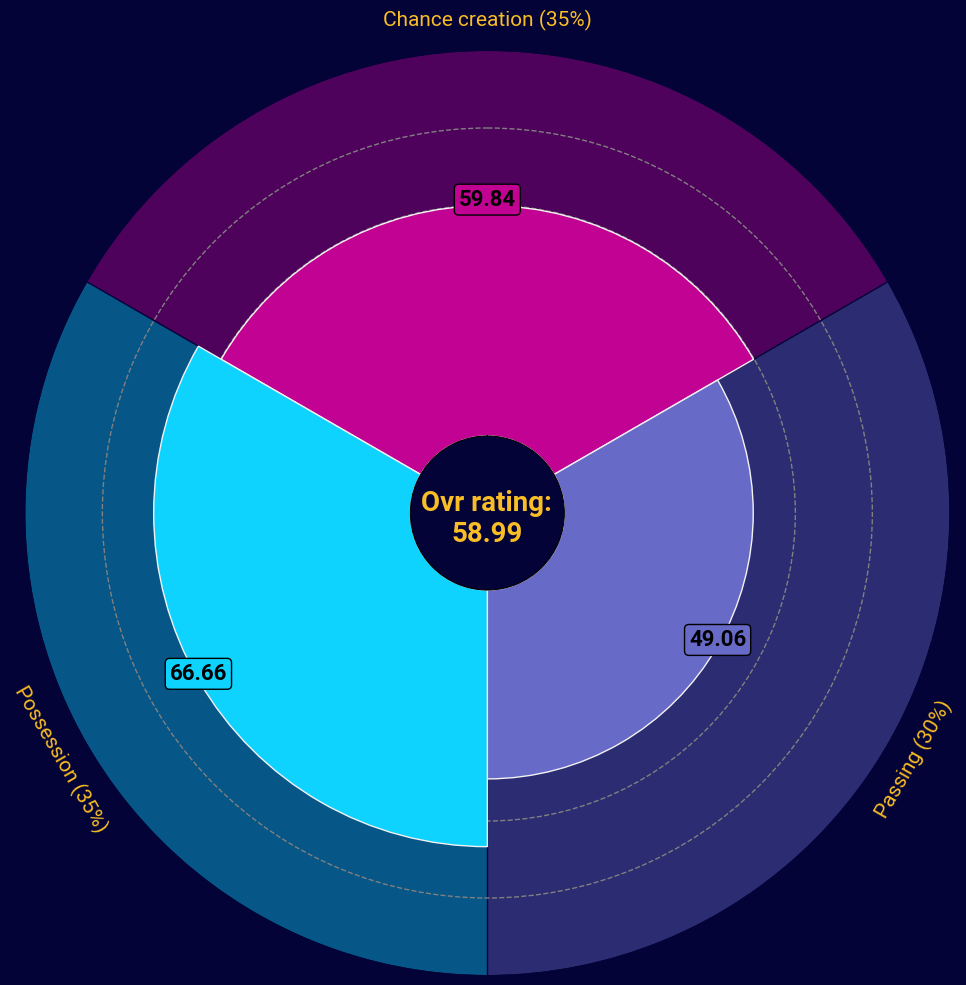

In [184]:
# Set default font for the figure
plt.rcParams["font.family"] = "Roboto"

baker = PyPizza(
    params=totalScores.columns.to_list()[1:-1],  # list of parameters
    background_color="#030338",  # background color
    straight_line_color="#030338",  # color for straight lines
    straight_line_lw=1,  # linewidth for straight lines
    last_circle_lw=0,  # linewidth of last circle
    other_circle_ls="--",  # linestyle for other circles
    other_circle_lw=1,  # linewidth for other circles
    inner_circle_size=20,  # size of inner circle
)

# Create a colormap
colors = ["#c20292", "#0dd3fe"]
cmap = LinearSegmentedColormap.from_list(
    "TokyoNight", colors, N=len(totalScores.columns.to_list()[1:-1])
)
slice_colors = [
    matplotlib.colors.rgb2hex(cmap(i))
    for i in range(len(totalScores.columns.to_list()[1:-1]))
]
text_colors = ["#000000"] * len(slice_colors)

fig, ax = baker.make_pizza(
    values=totalScores[totalScores["Player"] == "Sharn Freier"].values[0][
        1:-1
    ],  # list of values
    figsize=(12, 12),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#F9BD25", fontsize=15, va="center"
    ),  # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000",
        fontsize=16,
        fontweight="bold",
        zorder=3,
        bbox=dict(
            edgecolor="#000000",
            facecolor="cornflowerblue",
            boxstyle="round,pad=0.2",
            lw=1,
        ),
    ),  # values to be used when adding parameter-values
)

# Add overall rating to the middle of the radar chart
fig.text(
    0.512,
    0.49,
    "Ovr rating:\n{ovrRating}".format(
        ovrRating=totalScores[totalScores["Player"] == "Sharn Freier"][
            "Overall Rating"
        ].values[0]
    ),
    ha="center",
    va="center",
    fontsize=20,
    color="#F9BD25",
    fontweight="bold",
)

# Save the figure
plt.savefig("Radar.png", bbox_inches="tight", dpi=700)

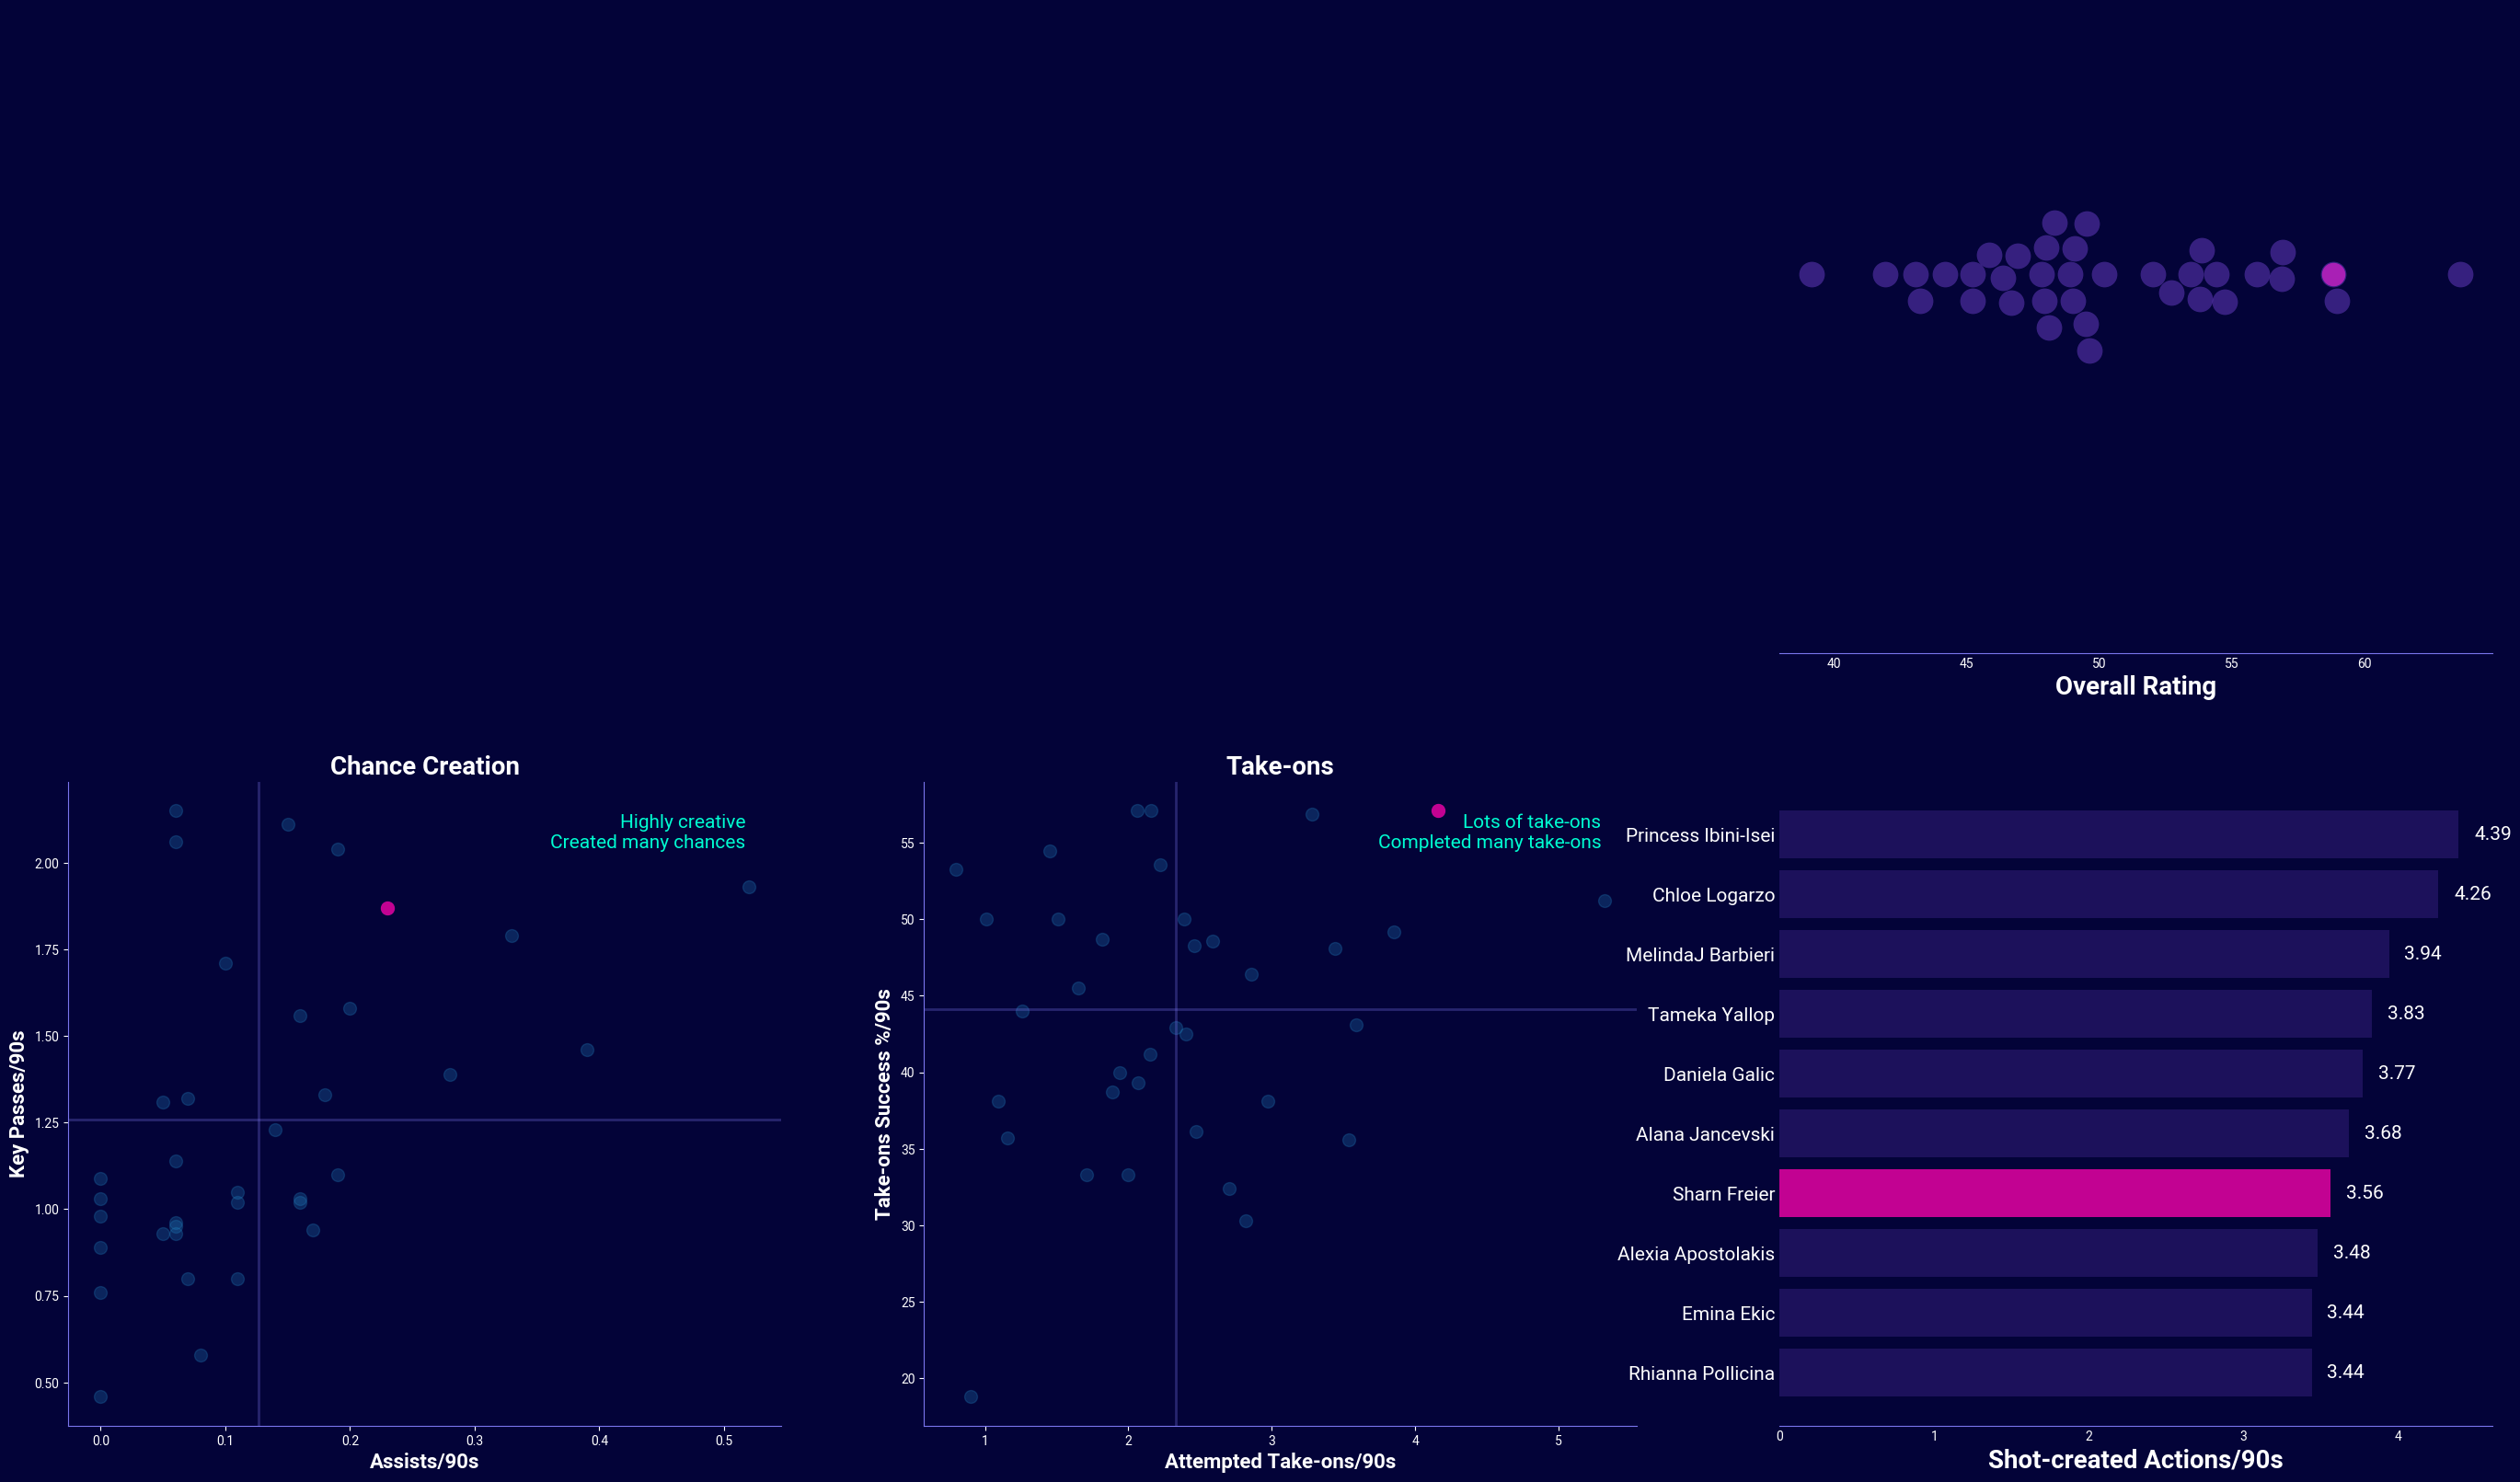

In [169]:
fig = plt.figure(figsize=(34, 20))

# Set default font for the figure
plt.rcParams["font.family"] = "Roboto"

# baker = PyPizza(
#     params=totalScores.columns.to_list()[1:-1],  # list of parameters
#     background_color="#030338",  # background color
#     straight_line_color="#030338",  # color for straight lines
#     straight_line_lw=1,  # linewidth for straight lines
#     last_circle_lw=0,  # linewidth of last circle
#     other_circle_ls="--",  # linestyle for other circles
#     other_circle_lw=1,  # linewidth for other circles
#     inner_circle_size=20,  # size of inner circle
# )

# Create a colormap
# colors = ["#c20292", "#0dd3fe"]
# cmap = LinearSegmentedColormap.from_list(
#     "TokyoNight", colors, N=len(totalScores.columns.to_list()[1:-1])
# )
# slice_colors = [
#     matplotlib.colors.rgb2hex(cmap(i))
#     for i in range(len(totalScores.columns.to_list()[1:-1]))
# ]
# text_colors = ["#000000"] * len(slice_colors)

# Plot a radar chart
ax = fig.add_subplot(2, 3, 4)
ax.axis("off")

# baker.make_pizza(
#     values=totalScores[totalScores["Player"] == "Sharn Freier"].values[0][
#         1:-1
#     ],  # list of values
#     figsize=(10, 10),  # adjust figsize according to your need

#     color_blank_space="same",  # use same color to fill blank space
#     slice_colors=slice_colors,  # color for individual slices
#     value_colors=text_colors,  # color for the value-text
#     value_bck_colors=slice_colors,  # color for the blank spaces
#     blank_alpha=0.4,  # alpha for blank-space colors
#     kwargs_slices=dict(
#         edgecolor="#F2F2F2", zorder=2, linewidth=1
#     ),  # values to be used when plotting slices
#     kwargs_params=dict(
#         color="#F9BD25", fontsize=15, va="center"
#     ),  # values to be used when adding parameter
#     kwargs_values=dict(
#         color="#000000",
#         fontsize=16,
#         zorder=3,
#         bbox=dict(
#             edgecolor="#000000",
#             facecolor="cornflowerblue",
#             boxstyle="round,pad=0.2",
#             lw=1,
#         ),
#     ),  # values to be used when adding parameter-values
# )


# Scatter plot for chance creation
ax = fig.add_subplot(2, 3, 4)
ax.scatter(filteredData["Assists"], filteredData["Key Passes"], alpha=0.3, s=100)

## Set the labels and title
ax.set_xlabel("Assists/90s", fontdict={"color": "white", "size": 16, "weight": "bold"})
ax.set_ylabel(
    "Key Passes/90s", fontdict={"color": "white", "size": 16, "weight": "bold"}
)
ax.tick_params(color="white", labelcolor="white")
ax.set_title(
    "Chance Creation", fontdict={"color": "white", "weight": "bold", "size": 20}
)

## Set the spines color and remove the top and right spines
for spine in ax.spines.values():
    if spine.spine_type == "bottom" or spine.spine_type == "left":
        spine.set_edgecolor("#7A75ED")
    else:
        spine.set_visible(False)

## Add average lines
ax.axvline(
    filteredData["Assists"].mean(),
    color="#7A75ED",
    linestyle="-",
    alpha=0.3,
    linewidth=2,
)

ax.axhline(
    filteredData["Key Passes"].mean(),
    color="#7A75ED",
    linestyle="-",
    alpha=0.3,
    linewidth=2,
)

## Add text to the top right corner for high values
ax.text(
    0.95,
    0.95,
    "Highly creative\nCreated many chances",
    color="#00ffd2",
    fontsize=15,
    ha="right",
    va="top",
    transform=ax.transAxes,
)

## Set the background color
ax.set_facecolor("#030338")

## Highlight Sharn Freier's stats
ax.scatter(
    filteredData[filteredData["Player"] == "Sharn Freier"]["Assists"],
    filteredData[filteredData["Player"] == "Sharn Freier"]["Key Passes"],
    color="#c20292",
    s=100,
)


# Scatter plot for Take-ons
ax = fig.add_subplot(2, 3, 5)
ax.scatter(
    filteredData["Attempted Take-ons"],
    filteredData["Take-ons Success %"],
    alpha=0.3,
    s=100,
)

## Set the labels and title
ax.set_xlabel(
    "Attempted Take-ons/90s", fontdict={"color": "white", "size": 16, "weight": "bold"}
)
ax.set_ylabel(
    "Take-ons Success %/90s", fontdict={"color": "white", "size": 16, "weight": "bold"}
)
ax.tick_params(color="white", labelcolor="white")
ax.set_title("Take-ons", fontdict={"color": "white", "weight": "bold", "size": 20})

## Set the spines color and remove the top and right spines
for spine in ax.spines.values():
    if spine.spine_type == "bottom" or spine.spine_type == "left":
        spine.set_edgecolor("#7A75ED")
    else:
        spine.set_visible(False)

## Add average lines
ax.axvline(
    filteredData["Attempted Take-ons"].mean(),
    color="#7A75ED",
    linestyle="-",
    alpha=0.3,
    linewidth=2,
)

ax.axhline(
    filteredData["Take-ons Success %"].mean(),
    color="#7A75ED",
    linestyle="-",
    alpha=0.3,
    linewidth=2,
)

## Add text to the top right corner for high values
ax.text(
    0.95,
    0.95,
    "Lots of take-ons\nCompleted many take-ons",
    color="#00ffd2",
    fontsize=15,
    ha="right",
    va="top",
    transform=ax.transAxes,
)


## Set the background color
ax.set_facecolor("#030338")

## Highlight Sharn Freier's stats
ax.scatter(
    filteredData[filteredData["Player"] == "Sharn Freier"]["Attempted Take-ons"],
    filteredData[filteredData["Player"] == "Sharn Freier"]["Take-ons Success %"],
    color="#c20292",
    s=100,
)

# Bar chart for Shot-created Actions
ax = fig.add_subplot(2, 3, 6)

## Retrieve values
chosenVariable = "Shot-created Actions"
barValues = filteredData.sort_values(by=chosenVariable, ascending=False).reset_index(
    drop=True
)

## Retrieve the top 5 players
barValues = barValues.head(10)

ax.barh(
    barValues["Player"],
    barValues[chosenVariable],
    color="#844EEC",
    alpha=0.2,
)

## Add text to the right of the bars
for i in range(len(barValues)):
    ax.text(
        barValues[chosenVariable].iloc[i] + 0.1,
        i,
        f"{barValues[chosenVariable].iloc[i]:.2f}",
        color="white",
        size=15,
        va="center",
    )

## Highlight Sharn Freier's stats
ax.barh(
    barValues[barValues["Player"] == "Sharn Freier"]["Player"],
    barValues[barValues["Player"] == "Sharn Freier"][chosenVariable],
    color="#c20292",
)

## Flip the y-axis
ax.invert_yaxis()

## Set the labels and title
ax.set_xlabel(
    f"{chosenVariable}/90s",
    fontdict={"color": "white", "size": 20, "weight": "bold"},
)
ax.tick_params(length=0, color="white", labelcolor="white")
ax.tick_params(axis="y", labelsize=15, labelcolor="white")

## Set the background color
ax.set_facecolor("#030338")

## Remove the spines except for the bottom one
for spine in ax.spines.values():
    if spine.spine_type != "bottom":
        spine.set_visible(False)
    else:
        spine.set_edgecolor("#7A75ED")

# Beeswarm plot for the overall rating
ax = fig.add_subplot(2, 3, 3)

ax = sns.swarmplot(
    x="Overall Rating",
    data=totalScores,
    color="#844EEC",
    size=20,
    alpha=0.4,
)

## Highlight Sharn Freier's stats
ax.scatter(
    totalScores[totalScores["Player"] == "Sharn Freier"]["Overall Rating"] - 0.15,
    0,
    color="#c20292",
    s=300,
)

## Set the labels and title
ax.set_xlabel(
    "Overall Rating",
    fontdict={"color": "white", "size": 20, "weight": "bold"},
)
ax.tick_params(length=0, color="white", labelcolor="white")

## Set the background color
ax.set_facecolor("#030338")

## Remove the spines except for the bottom one
for spine in ax.spines.values():
    if spine.spine_type != "bottom":
        spine.set_visible(False)
    else:
        spine.set_edgecolor("#7A75ED")


fig.set_facecolor("#030338")

## Save the figure
plt.savefig("Dashboard.png", facecolor="#030338", bbox_inches="tight", dpi=700)